In [5]:
#from google.colab import files
#uploaded = files.upload()

In [6]:
import pandas as pd
df = pd.read_csv('hotel_bookings.csv')

In [7]:
import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [8]:
# Display initial info
print('Initial Data Info:')
print(df.info())
print('\nInitial Missing Values:')
print(df.isna().sum())
print('\nDuplicates:', df.duplicated().sum())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 1

In [9]:
# Handle duplicates
df = df.drop_duplicates()
print('Duplicates after removal:', df.duplicated().sum())

Duplicates after removal: 0


In [10]:
# Handle missing values
# Numeric columns: impute with median
numeric_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
for col in numeric_cols:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

# Categorical columns: impute with mode or placeholder
if 'country' in df.columns:
    df['country'].fillna('Unknown', inplace=True)
if 'agent' in df.columns:
    df['agent'].fillna('None', inplace=True)
if 'company' in df.columns:
    df['company'].fillna('None', inplace=True)

print('Missing Values after Imputation:')
print(df.isna().sum())

Missing Values after Imputation:


/tmp/ipython-input-1081591764.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-1081591764.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

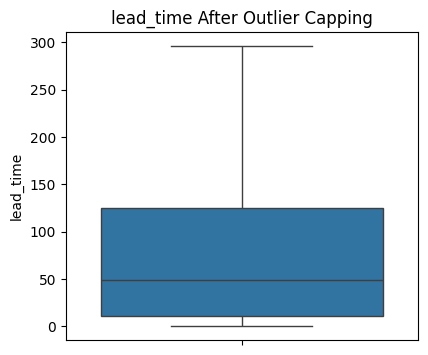

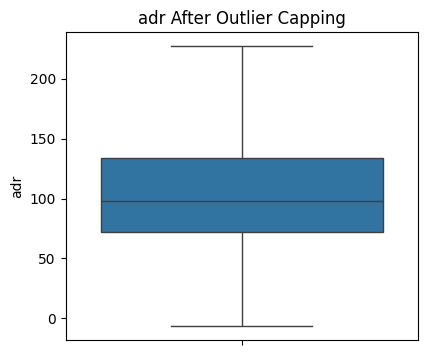

In [11]:
# Handle outliers using IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

for col in ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights']:
    if col in df.columns:
        cap_outliers(df, col)

# Visualize outliers before and after
for col in ['lead_time', 'adr']:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[col])
    plt.title(f'{col} After Outlier Capping')
    plt.show()

In [12]:
# Correct data types
if 'children' in df.columns:
    df['children'] = df['children'].astype(int)
if 'babies' in df.columns:
    df['babies'] = df['babies'].astype(int)
if 'arrival_date_year' in df.columns:
    df['arrival_date_year'] = df['arrival_date_year'].astype(int)

# Validate logical consistency
df = df[df['adults'] > 0]  # Must have at least 1 adult
df = df[df['children'] >= 0]
df = df[df['babies'] >= 0]

print('Data Types after Correction:')
print(df.dtypes)

Data Types after Correction:
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights              float64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent